<a href="https://colab.research.google.com/github/amicarellade/cs4342-finalp/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project 


## Overview of Dataset


## Steps



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
# Dante's repositories 

df = pd.read_csv('/content/drive/MyDrive/CS 4342 ML/Final Project CS4342/Time Americans Spend Sleeping.csv')
df

,index,Year,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group,Activity,Sex
0,0,2003,Annual,8.57,0.018,All days,15 years and over,Sleeping,Both
1,1,2004,Annual,8.55,0.026,All days,15 years and over,Sleeping,Both
2,2,2005,Annual,8.62,0.023,All days,15 years and over,Sleeping,Both
3,3,2006,Annual,8.63,0.024,All days,15 years and over,Sleeping,Both
4,4,2007,Annual,8.57,0.024,All days,15 years and over,Sleeping,Both
...,...,...,...,...,...,...,...,...,...
940,940,2013,Annual,8.83,0.085,Nonholiday weekdays,65 years and over,Sleeping,Women
941,941,2014,Annual,8.98,0.086,Nonholiday weekdays,65 years and over,Sleeping,Women
942,942,2015,Annual,8.83,0.074,Nonholiday weekdays,65 years and over,Sleeping,Women
943,943,2016,Annual,8.92,0.071,Nonholiday weekdays,65 years and over,Sleeping,Women


In [ ]:
# Mason's Repositories
df = pd.read_csv('/content/Time Americans Spend Sleeping.csv')
df.head()

,index,Year,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group,Activity,Sex
0,0,2003,Annual,8.57,0.018,All days,15 years and over,Sleeping,Both
1,1,2004,Annual,8.55,0.026,All days,15 years and over,Sleeping,Both
2,2,2005,Annual,8.62,0.023,All days,15 years and over,Sleeping,Both
3,3,2006,Annual,8.63,0.024,All days,15 years and over,Sleeping,Both
4,4,2007,Annual,8.57,0.024,All days,15 years and over,Sleeping,Both


# EDA

In [37]:
# droppin index column

df.drop('index',axis=1,inplace=True)

([<matplotlib.axis.XTick at 0x7fb5390232e0>,
 <a list of 15 Text major ticklabel objects>)

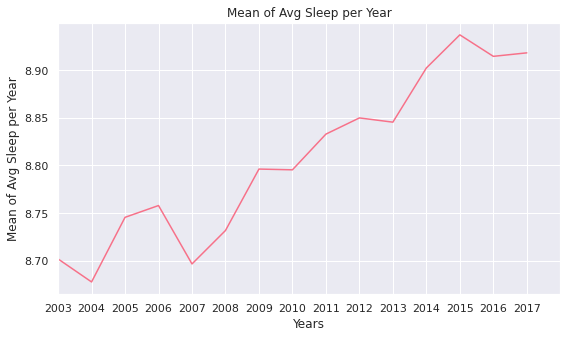

In [49]:
plt.figure(figsize=(9,5))
sns.set_palette('husl')
plt.plot(df.groupby('Year')['Avg hrs per day sleeping'].mean())
plt.ylabel('Mean of Avg Sleep per Year')
plt.xlabel('Years')
plt.title('Mean of Avg Sleep per Year')
plt.xlim(2003,2018)
plt.xticks([*range(2003,2018)])

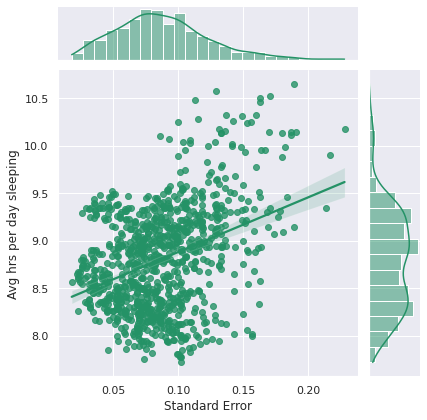

In [50]:
sns.set_palette('summer')
sns.jointplot(kind='reg',y='Avg hrs per day sleeping',x='Standard Error',data=df)

In [38]:
df['Sex'].value_counts()

Both     315
Men      315
Women    315
Name: Sex, dtype: int64

In [39]:
# Add One Hot Encoding to ShelveLoc
# df5['Bad'] = np.where((df5.ShelveLoc == 'Bad'), 1, 0)
# df5['Medium'] = np.where((df5.ShelveLoc == 'Medium'), 1, 0)
# df5['Good'] = np.where((df5.ShelveLoc == 'Good'), 1, 0)
# df5 = df5.drop(['ShelveLoc'], axis=1)
# df5

# One-hot encoding Sex category

df['Both'] = np.where((df.Sex == 'Both'), 1, 0)
df['Female'] = np.where((df.Sex == 'Women'), 1, 0)
df['Male'] = np.where((df.Sex == 'Men'), 1, 0)
df = df.drop(['Sex'], axis = 1)
df




,Year,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group,Activity,Both,Female,Male
0,2003,Annual,8.57,0.018,All days,15 years and over,Sleeping,1,0,0
1,2004,Annual,8.55,0.026,All days,15 years and over,Sleeping,1,0,0
2,2005,Annual,8.62,0.023,All days,15 years and over,Sleeping,1,0,0
3,2006,Annual,8.63,0.024,All days,15 years and over,Sleeping,1,0,0
4,2007,Annual,8.57,0.024,All days,15 years and over,Sleeping,1,0,0
...,...,...,...,...,...,...,...,...,...,...
940,2013,Annual,8.83,0.085,Nonholiday weekdays,65 years and over,Sleeping,0,1,0
941,2014,Annual,8.98,0.086,Nonholiday weekdays,65 years and over,Sleeping,0,1,0
942,2015,Annual,8.83,0.074,Nonholiday weekdays,65 years and over,Sleeping,0,1,0
943,2016,Annual,8.92,0.071,Nonholiday weekdays,65 years and over,Sleeping,0,1,0


In [40]:
df['Type of Days'].value_counts()


All days                     315
Nonholiday weekdays          315
Weekend days and holidays    315
Name: Type of Days, dtype: int64

In [41]:
df['All days'] = np.where((df['Type of Days'] == 'All days'), 1, 0)
df['Weekdays'] = np.where((df['Type of Days'] == 'Nonholiday weekdays'), 1, 0)
df['WeekendsHolidays'] = np.where((df['Type of Days'] == 'Weekend days and holidays'), 1, 0)
df = df.drop(['Type of Days'], axis = 1)
df

,Year,Period,Avg hrs per day sleeping,Standard Error,Age Group,Activity,Both,Female,Male,All days,Weekdays,WeekendsHolidays
0,2003,Annual,8.57,0.018,15 years and over,Sleeping,1,0,0,1,0,0
1,2004,Annual,8.55,0.026,15 years and over,Sleeping,1,0,0,1,0,0
2,2005,Annual,8.62,0.023,15 years and over,Sleeping,1,0,0,1,0,0
3,2006,Annual,8.63,0.024,15 years and over,Sleeping,1,0,0,1,0,0
4,2007,Annual,8.57,0.024,15 years and over,Sleeping,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
940,2013,Annual,8.83,0.085,65 years and over,Sleeping,0,1,0,0,1,0
941,2014,Annual,8.98,0.086,65 years and over,Sleeping,0,1,0,0,1,0
942,2015,Annual,8.83,0.074,65 years and over,Sleeping,0,1,0,0,1,0
943,2016,Annual,8.92,0.071,65 years and over,Sleeping,0,1,0,0,1,0


In [42]:
df['Age Group'].value_counts()


15 years and over    135
15 to 24 years       135
25 to 34 years       135
35 to 44 years       135
45 to 54 years       135
55 to 64 years       135
65 years and over    135
Name: Age Group, dtype: int64

In [43]:
df['U15'] = np.where((df['Age Group'] == '15 years and over'), 1, 0)
df['15-24'] = np.where((df['Age Group'] == '15 to 24 years'), 1, 0)
df['25-34'] = np.where((df['Age Group'] == '25 to 34 years'), 1, 0)
df['35-44'] = np.where((df['Age Group'] == '35 to 44 years'), 1, 0)
df['45-54'] = np.where((df['Age Group'] == '45 to 54 years'), 1, 0)
df['55-64'] = np.where((df['Age Group'] == '55 to 64 years'), 1, 0)
df['65+'] = np.where((df['Age Group'] == '65 years and over'), 1, 0)
df = df.drop(['Age Group'], axis = 1)
df

,Year,Period,Avg hrs per day sleeping,Standard Error,Activity,Both,Female,Male,All days,Weekdays,WeekendsHolidays,U15,15-24,25-34,35-44,45-54,55-64,65+
0,2003,Annual,8.57,0.018,Sleeping,1,0,0,1,0,0,1,0,0,0,0,0,0
1,2004,Annual,8.55,0.026,Sleeping,1,0,0,1,0,0,1,0,0,0,0,0,0
2,2005,Annual,8.62,0.023,Sleeping,1,0,0,1,0,0,1,0,0,0,0,0,0
3,2006,Annual,8.63,0.024,Sleeping,1,0,0,1,0,0,1,0,0,0,0,0,0
4,2007,Annual,8.57,0.024,Sleeping,1,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,2013,Annual,8.83,0.085,Sleeping,0,1,0,0,1,0,0,0,0,0,0,0,1
941,2014,Annual,8.98,0.086,Sleeping,0,1,0,0,1,0,0,0,0,0,0,0,1
942,2015,Annual,8.83,0.074,Sleeping,0,1,0,0,1,0,0,0,0,0,0,0,1
943,2016,Annual,8.92,0.071,Sleeping,0,1,0,0,1,0,0,0,0,0,0,0,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      945 non-null    int64  
 1   Period                    945 non-null    object 
 2   Avg hrs per day sleeping  945 non-null    float64
 3   Standard Error            945 non-null    float64
 4   Activity                  945 non-null    object 
 5   Both                      945 non-null    int64  
 6   Female                    945 non-null    int64  
 7   Male                      945 non-null    int64  
 8   All days                  945 non-null    int64  
 9   Weekdays                  945 non-null    int64  
 10  WeekendsHolidays          945 non-null    int64  
 11  U15                       945 non-null    int64  
 12  15-24                     945 non-null    int64  
 13  25-34                     945 non-null    int64  
 14  35-44     

In [45]:
df.describe()

,Year,Avg hrs per day sleeping,Standard Error,Both,Female,Male,All days,Weekdays,WeekendsHolidays,U15,15-24,25-34,35-44,45-54,55-64,65+
count,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,2010.000000,8.806868,0.086958,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
std,4.322782,0.545001,0.034631,0.471654,0.471654,0.471654,0.471654,0.471654,0.471654,0.350112,0.350112,0.350112,0.350112,0.350112,0.350112,0.350112
min,2003.000000,7.720000,0.018000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,8.360000,0.063000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2010.000000,8.810000,0.084000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2014.000000,9.190000,0.106000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2017.000000,10.650000,0.228000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
#  Finding null value percentage 

pd.DataFrame((100*df.isnull().sum()/len(df)),columns=['Null %'])


,Null %
Year,0.0
Period,0.0
Avg hrs per day sleeping,0.0
Standard Error,0.0
Activity,0.0
Both,0.0
Female,0.0
Male,0.0
All days,0.0
Weekdays,0.0


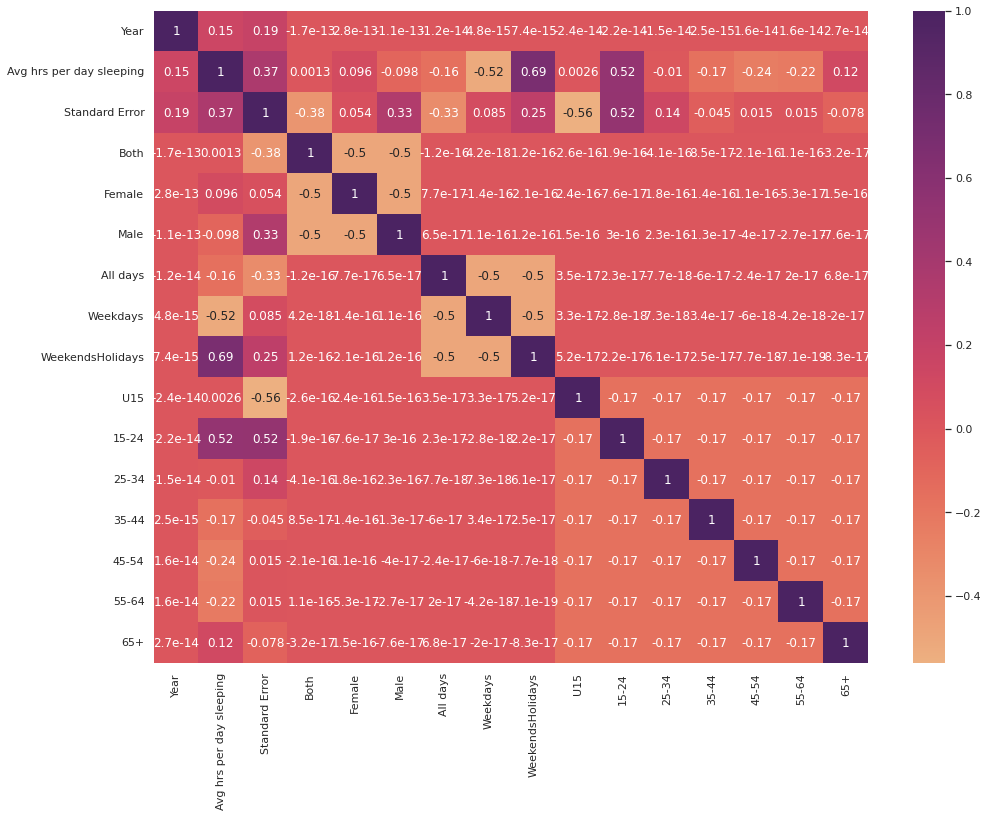

In [48]:
# Correlation of variables

sns.set(rc={"figure.figsize":(16, 12)}) #width=12, #height=12
sns.heatmap(df.corr(),cmap='flare',annot=True)

